Clustering aims to find natural groupings or clusters within a dataset   
Euclidean distance formula   


1 Scale the data  
2 Elbow method (to deermine the number of clusters)
3 Instance of Kmeans class and use fit method
4 Silhoutte method 
is a technique used to evaluate the goodness of clustering algorithm It provides the measure of how wellseparated the clusters are
the silhoutte score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters  
5 PCA


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wine-clustering.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [12]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


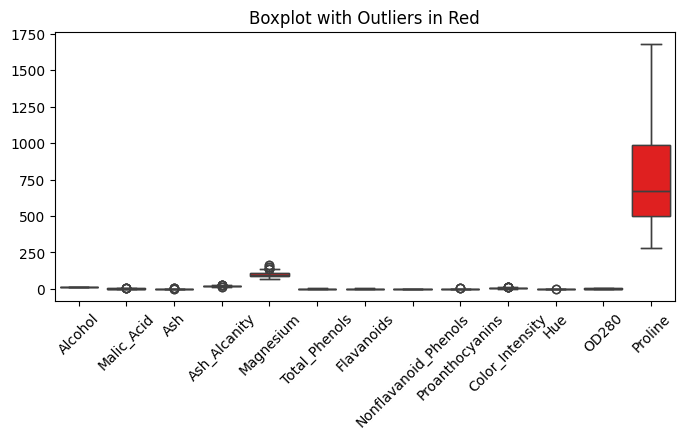

In [13]:
import seaborn as sns
plt.figure(figsize=(8, 3.5))
sns.boxplot(data=df, color='lightblue')
sns.boxplot(data=df, color='red')
plt.title("Boxplot with Outliers in Red")
plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [15]:
# elbow method
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

C:\Users\sudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

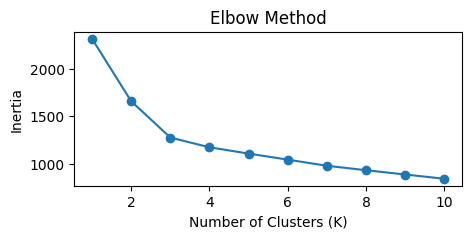

In [16]:
# Plotting the Elbow Method
plt.figure(figsize=(5, 2))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [18]:

kmeans = KMeans(n_clusters=3, random_state=42)
y = kmeans.fit_predict(X) 
df['Cluster'] = y
# method fits the KMeans model to the input data X and returns an array y 

C:\Users\sudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2848589191898987


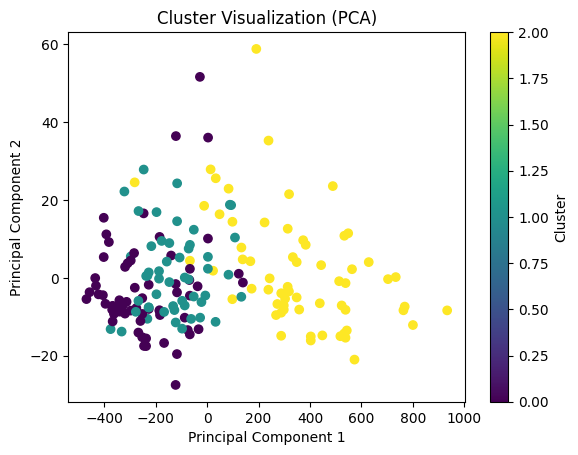

In [25]:
# PCA is applied to reduce the data to 2 dimensions.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, cmap='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# n_components=2, indicating that the goal is to reduce the data to two dimensions


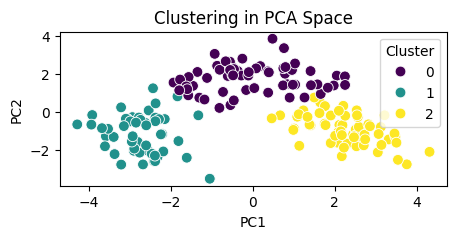

In [26]:
# A DataFrame (pc_df) is created with the principal components and cluster labels.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = y
plt.figure(figsize=(5, 2))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='viridis', s=60)
plt.title("Clustering in PCA Space")
plt.show()


In [27]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

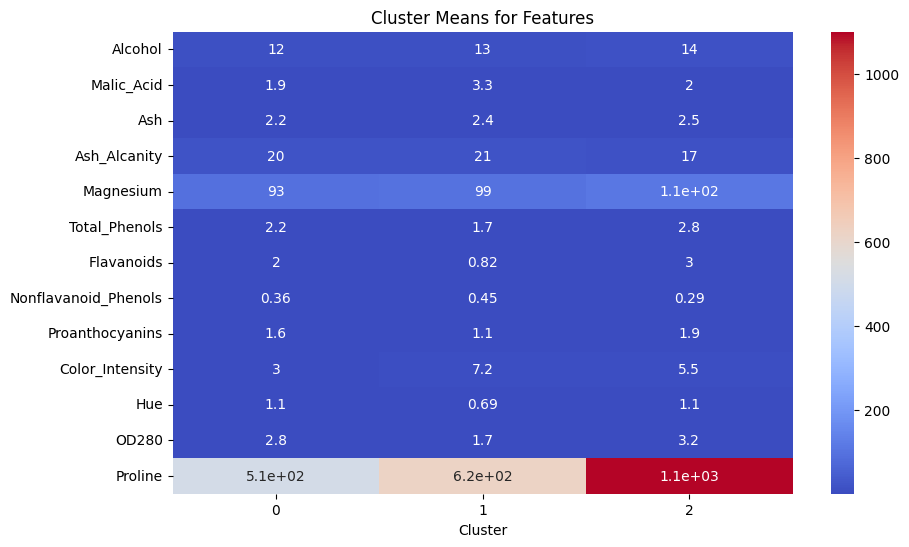

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Cluster Means for Features')
plt.show()

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

In [29]:
# Assuming df is your original DataFrame with the wine details
# and 'Cluster' is the column containing cluster labels

# Create a new DataFrame with row numbers and their corresponding cluster labels
cluster_assignment_df = pd.DataFrame({'RowNo': df.index, 'Cluster': df['Cluster']})

# Display the DataFrame with cluster assignments
print(cluster_assignment_df)


     RowNo  Cluster
0        0        2
1        1        2
2        2        2
3        3        2
4        4        2
..     ...      ...
173    173        1
174    174        1
175    175        1
176    176        1
177    177        1

[178 rows x 2 columns]
